In [12]:
from gibbs import *
from data_simu import *
from mcmc_plot import *
from geweke_full import *

## 1.Simulate Data

In [13]:
# data dimension
d = 5
# true component dimension
q_star = d-1
# sample size
n_sample = 1000
# true sigma2
sigma2_star = 1
# true component variance parameter
a_star_list = 1 / np.linspace(1,10,q_star)

In [14]:
X = generate_data(d, q_star, n_sample, sigma2_star, a_star_list)

Text(0, 0.5, 'Component j')

<Figure size 720x432 with 0 Axes>

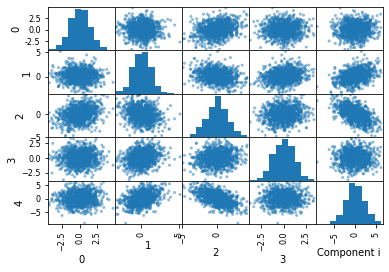

In [15]:
plt.figure(figsize=(10,6))
pd.plotting.scatter_matrix(pd.DataFrame(X).T)
plt.xlabel('Component i')
plt.ylabel('Component j')

## 2. Gibbs Sampling

### 2.1 Prior Parameter Setup

In [16]:
q = d-1
a_vj = 0.5 * d * np.ones(q) + 1
epislon = 0.1

prior_param = dict({'beta_sigma2': 0.5,
                        'a_sigma2': 3,
                        'a_vj': a_vj,
                        'beta_vj': epislon * (a_vj - 1)
                        })

### 2.2 Inference Parameter Setup

In [17]:
init_dict = dict({'Z0': np.random.normal(0, 1, [q, 1]),
                      "sigma20": np.random.gamma(3, 0.1),
                      "w0": np.random.normal(0, 1, [d, q]),
                      "v0": np.random.gamma(1, 2, d - 1)})

iterations = 2000

### 2.3 Inference Sampling standard

In [18]:
inference = Model(X, init_dict, iterations, q, prior_param)
infer_list = inference.gibbs_result()

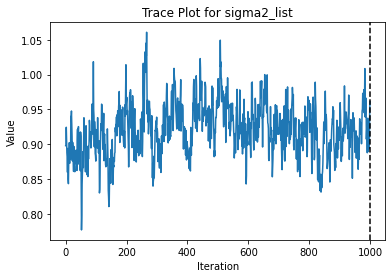

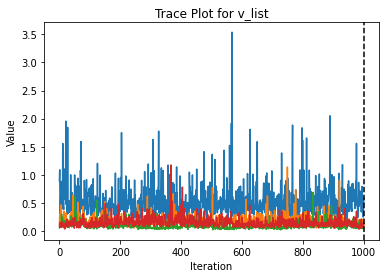

In [25]:
var_list = ['sigma2_list', 'v_list']
trace_plot([infer_list], var_list)

In [30]:
sigma2_list = get_trace_list([infer_list], 'sigma2_list')
Z_list = get_trace_list([infer_list], 'Z_list')
W_list = get_trace_list([infer_list], 'W_list')
v_list = get_trace_list([infer_list], 'v_list')

In [43]:
print(pd.DataFrame(v_list[0]).mean())

0    0.528230
1    0.174053
2    0.095213
3    0.148865
dtype: float64


### 2.4 Inference Sampling Approxmiate

In [37]:
infer_list = gibbs_scheme(X, init_dict, iterations, q, prior_param, xi =0.5)
sigma2_list = infer_list[0]
Z_list = infer_list[1]
W_list = infer_list[2]
alpha_list = infer_list[3]
warmup = int(iterations/2)

In [43]:
print(pd.DataFrame(alpha_list[warmup:]).mean())

0     3.086920
1     7.443893
2    12.948839
3     1.022727
dtype: float64


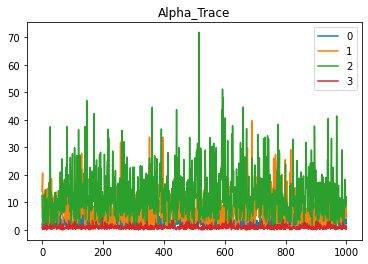

In [39]:
pd.DataFrame(alpha_list[warmup:]).plot()
#pd.DataFrame(W_list[-1]).plot.hist()
plt.title('Alpha_Trace')
plt.show()

Text(0.5, 1.0, 'Sigma2 trace')

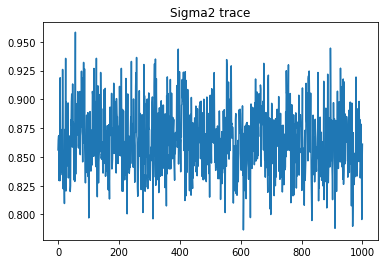

In [40]:
plt.plot(sigma2_list[warmup:])
plt.title('Sigma2 trace')